In [1]:
import numpy as np 
from keras.datasets import imdb
from keras import models,layers,optimizers,initializers

2023-08-24 21:04:22.310824: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 21:04:22.535951: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 21:04:22.537285: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 21:04:23.660083: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Cargando Nuestro Dataset

In [2]:
(train_data,train_labels),(test_data,test_labels)= imdb.load_data(num_words=10000,seed=2023)
#(train_data,train_labels),(test_data,test_labels)= imdb.load_data(seed=2023)

In [3]:
word_index=imdb.get_word_index()

inverted_word_index = dict([(value +3,key) for (key,value) in word_index.items()])

In [4]:
word_index
inverted_word_index

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [5]:
inverted_word_index[1]='[START]'
inverted_word_index[2]='[OOV]'

decoded_sequence = " ".join(inverted_word_index[i] for i in train_data[0])
decoded_sequence



"[START] i was the production [OOV] on this movie and i also got to do some voice over work on it so i'm not entirely [OOV] but if it were awful i would say so i thought it was a fun film not a [OOV] acclaimed masterpiece by any means but there were plenty of laughs along the way the bible states that laughter does good like a medicine so watching this movie could be good for your health br br so many of the actors in this picture hadn't yet reached their peak at the time we made this film susan sarandon of course is one who has since gone on to much greater fame [OOV] [OOV] was seen on tv on a weekly basis as a photographer in the thirty something tv drama series robert englund later became known as [OOV] krueger still haunting people's dreams one of my personal favorite actors on this show was dub taylor who played the sheriff he was an excellent comedic actor and a truly nice sincere person we all had fun working on this show and i think that fun comes through"

### Creamos una función para Vectorizar 

In [6]:
def vectorizar (sequencia,dim=10000):
    resultado= np.zeros((len(sequencia),dim))
    for i , secuencia in enumerate(sequencia):
        resultado[i,secuencia]=1
    return resultado     

In [7]:
x_train= vectorizar(train_data)
x_test= vectorizar(test_data)

In [8]:
y_train=np.asanyarray(train_labels).astype('float32')
y_test=np.asanyarray(test_labels).astype('float32')

### Definir la Red Neural 

In [9]:
iniciador = initializers.HeNormal(seed=83)

model= models.Sequential()
model.add(layers.Dense(15,activation='relu',input_shape=(10000,),kernel_initializer=iniciador))
model.add(layers.Dense(15,activation='relu',kernel_initializer=iniciador))
model.add(layers.Dense(1,activation='sigmoid',kernel_initializer=iniciador))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
          

### Construir Datos de Validación 

In [10]:
x_val = x_train[:10000]
x_train2=x_train[10000:]

y_val = y_train[:10000]
y_train2=y_train[10000:]




### Entrenando Nuestra Red

In [11]:
history = model.fit(x_train2,y_train2,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5573 - acc: 0.7573 - val_loss: 0.4462 - val_acc: 0.8307
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3429 - acc: 0.8928 - val_loss: 0.3247 - val_acc: 0.8822
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2453 - acc: 0.9229 - val_loss: 0.3160 - val_acc: 0.8736
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1960 - acc: 0.9381 - val_loss: 0.2847 - val_acc: 0.8853
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1638 - acc: 0.9482 - val_loss: 0.2829 - val_acc: 0.8894
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1388 - acc: 0.9580 - val_loss: 0.3149 - val_acc: 0.8743
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1193 - acc: 0.9655 - val_loss: 0.3024 - val_acc: 0.8866
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1038 - a

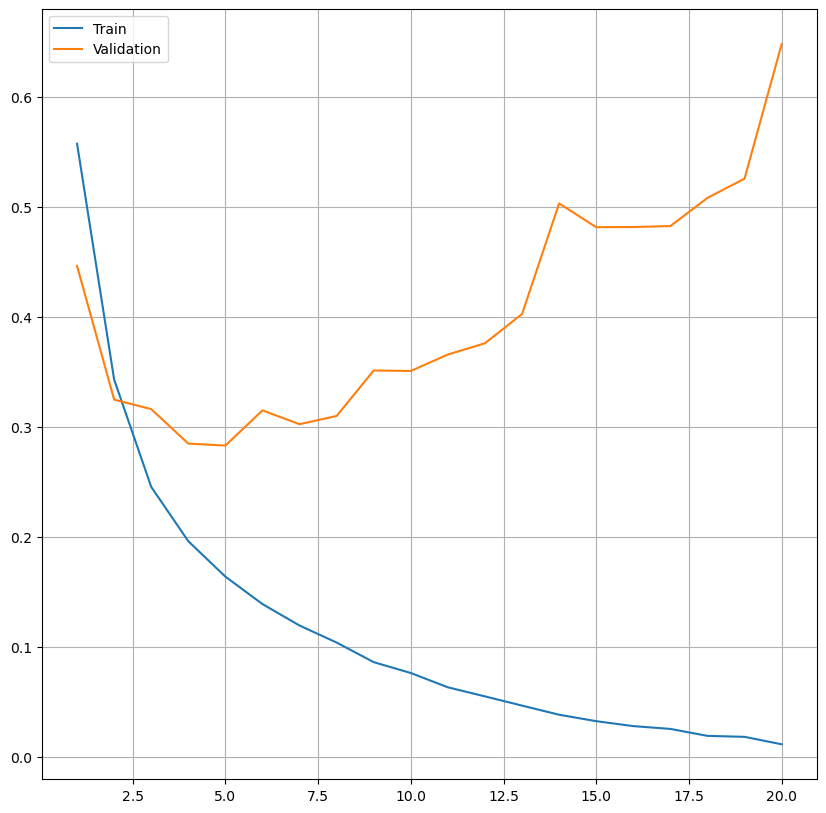

In [12]:
import matplotlib.pyplot as plt

data=history.history

loss_values = data['loss']
loss_val_values= data['val_loss']

epoch = range(1,len(loss_values)+1)

plt.figure(figsize=(10,10))
plt.plot(epoch,loss_values,label='Train')
plt.plot(epoch,loss_val_values,label='Validation')
plt.legend()
plt.grid()
plt.show()


### Reduciendo la Complejidad del Modelo 

In [13]:
model2= models.Sequential()
model2.add(layers.Dense(6,activation='relu',input_shape=(10000,),kernel_initializer=iniciador))
model2.add(layers.Dense(3,activation='relu',kernel_initializer=iniciador))
model2.add(layers.Dense(1,activation='sigmoid',kernel_initializer=iniciador))
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history2 = model2.fit(x_train2,y_train2,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5430 - acc: 0.7604 - val_loss: 0.4214 - val_acc: 0.8609
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3529 - acc: 0.8952 - val_loss: 0.3434 - val_acc: 0.8779
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2721 - acc: 0.9171 - val_loss: 0.3033 - val_acc: 0.8855
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2229 - acc: 0.9319 - val_loss: 0.3043 - val_acc: 0.8796
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1890 - acc: 0.9431 - val_loss: 0.2788 - val_acc: 0.8907
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1656 - acc: 0.9510 - val_loss: 0.2772 - val_acc: 0.8901
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1452 - acc: 0.9577 - val_loss: 0.2798 - val_acc: 0.8884
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1281 - a

KeyboardInterrupt: 

## Aplicando Estrategias de Regularización 

In [ ]:
from keras import regularizers

model3= models.Sequential()
model3.add(layers.Dense(15,activation='relu',input_shape=(10000,),kernel_initializer=iniciador,kernel_regularizer=regularizers.l1(0.001)))
model3.add(layers.Dense(15,activation='relu',kernel_initializer=iniciador,kernel_regularizer=regularizers.l1(0.001)))
model3.add(layers.Dense(1,activation='sigmoid',kernel_initializer=iniciador))
model3.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history3 = model3.fit(x_train2,y_train2,epochs=20,batch_size=512,validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 1.1423 - acc: 0.7239 - val_loss: 0.7338 - val_acc: 0.7684
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.6580 - acc: 0.8475 - val_loss: 0.6350 - val_acc: 0.8523
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6082 - acc: 0.8567 - val_loss: 0.5983 - val_acc: 0.8617
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.5755 - acc: 0.8670 - val_loss: 0.5906 - val_acc: 0.8559
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5529 - acc: 0.8753 - val_loss: 0.6108 - val_acc: 0.8397
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5496 - acc: 0.8723 - val_loss: 0.5798 - val_acc: 0.8539
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5374 - acc: 0.8756 - val_loss: 0.5598 - val_acc: 0.8649
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5276 - a

## Aplicando el Dropout

In [ ]:
model4= models.Sequential()
model4.add(layers.Dense(15,activation='relu',input_shape=(10000,),kernel_initializer=iniciador))
model4.add(layers.Dropout(0.6))
model4.add(layers.Dense(15,activation='relu',kernel_initializer=iniciador))
model4.add(layers.Dropout(0.6))
model4.add(layers.Dense(1,activation='sigmoid',kernel_initializer=iniciador))
model4.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history4 = model4.fit(x_train2,y_train2,epochs=20,batch_size=512,validation_data=(x_val,y_val))  

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6503 - acc: 0.6200 - val_loss: 0.5715 - val_acc: 0.7558
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5684 - acc: 0.7413 - val_loss: 0.4981 - val_acc: 0.8291
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5063 - acc: 0.7943 - val_loss: 0.4435 - val_acc: 0.8715
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4649 - acc: 0.8321 - val_loss: 0.4095 - val_acc: 0.8619
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4290 - acc: 0.8507 - val_loss: 0.3669 - val_acc: 0.8817
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3993 - acc: 0.8704 - val_loss: 0.3761 - val_acc: 0.8698
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3745 - acc: 0.8811 - val_loss: 0.3580 - val_acc: 0.8772
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3469 - a

### Comparar los Resultados 

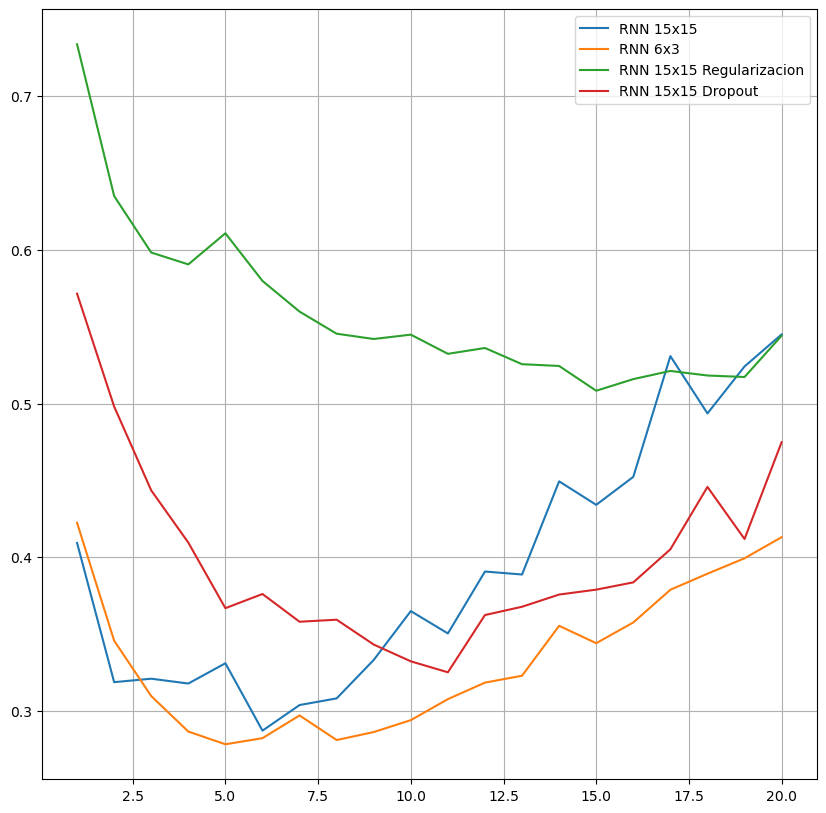

In [ ]:
epoch = range(1,len(loss_values)+1)


plt.figure(figsize=(10,10))
plt.plot(epoch,history.history['val_loss'],label='RNN 15x15')
plt.plot(epoch,history2.history['val_loss'],label='RNN 6x3')
plt.plot(epoch,history3.history['val_loss'],label='RNN 15x15 Regularizacion')
plt.plot(epoch,history4.history['val_loss'],label='RNN 15x15 Dropout')
plt.legend()
plt.grid()
plt.show()